1. 의사결정나무(Decision Tree)
A. 의사결정나무 모형
1) 일련의 독립변수들을 활용하여 분류를 하거나 예측을 수행하는 기법

2) 최종 결과물이 "일련의 규칙들"로 표현됨

3) Decision Trees 또는 Trees라고 불림

B. 의사결정나무의 2가지 기본 아이디어
1) 반복적 분할(Recursive partitioning)

① 레코드들을 두 부분으로 반복해서 잘라 세분된 영역 내의 동질성이 최대가 되도록 함

② 계속 잘라나가다 보면 모든 학습용 데이터를 100% 정확하게 분류해 낼 수 있을 만큼 세분화 해 나갈 수 있음

2) 분류나무의 가지치기(Pruning the tree)

① 반복적 분할을 반복하다 보면 과적합화는 피할 수 없이 나타나게 됨

② 과적합화를 피하기 위해 불필요한 가지(정보 제공이 그리 많지 않은 가지)를 제거함으로써 나무를 단순화하는 작업이 이루어지게 됨

C. 반복적 분할의 예
수입과 주택 크기의 상관관계를 예시로 설명

1) 첫번째 분할: Lot Size = 19,000

#### 1) 의사결정나무 모형(moons 데이터셋)

학습용: 0.9066666666666666
검증용: 0.92


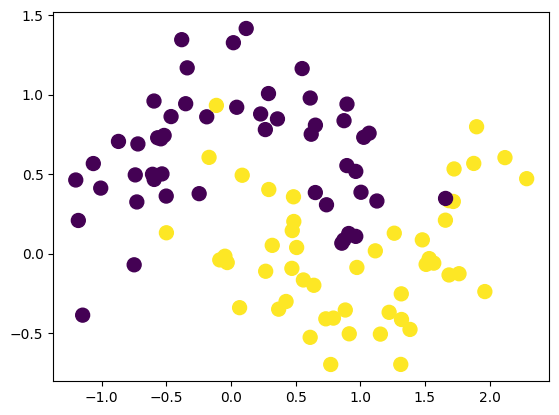

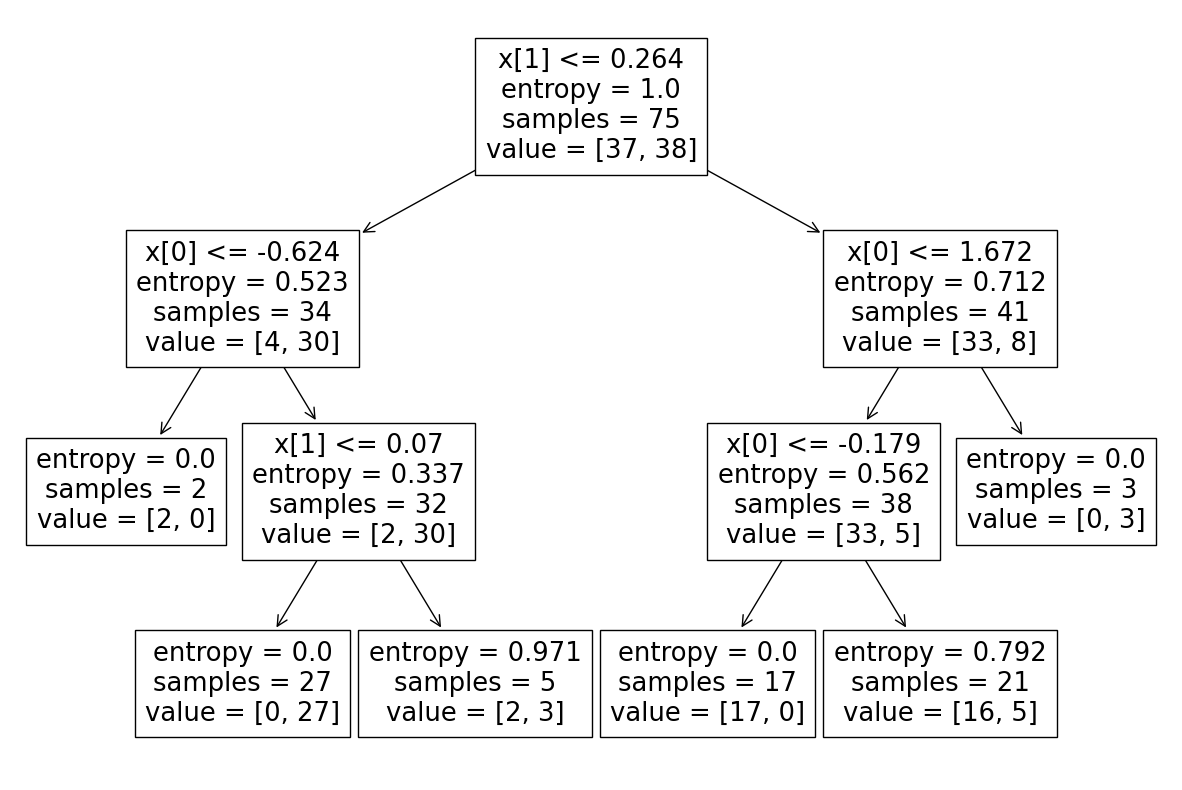

ModuleNotFoundError: No module named 'pydotplus'

In [1]:
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt

#noise 표준편차

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

################################################

from sklearn.tree import DecisionTreeClassifier

# criterion(entropy,gini)

model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='entropy')

model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

################################################

from sklearn import tree

plt.figure(figsize=(15,10))

tree.plot_tree(model)

plt.show()

################################################

#동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 계속 나온다면 순도 최대

#엔트로피 : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(무질서,불확실성  최소, 순도 최대) => 엔트로피 0

#   반반씩 섞여 있을 경우(불확실성 최대, 순도 최소) => 엔트로피 1

#gini index(지니 계수) : 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대),  0.5이면 불확실성 최대, 순도 최소

################################################

# graphviz exe 설치(path 추가 옵션 선택)

from sklearn.tree import export_graphviz

import pydotplus

import graphviz

from IPython.display import Image

import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

################################################

# 에러가 발생할 경우 

# pip install joblib==1.1.0

import matplotlib.pyplot as plt

import mglearn

plt.figure(figsize=(9,6))

plt.title("Tree")

#클래스 구분면

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [3]:
!python3 -m pip install --upgrade pip setuptools wheel

Python


In [2]:
!C:\Python38\Scripts\pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -------------------------------------- 278.7/278.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: No .egg-info directory found in C:\Users\tjoeun\AppData\Local\Temp\pip-pip-egg-info-m3ul8iz_


#### 2) 트리 모형의 criterion(엔트로피와 지니)

In [4]:
#동전 던지기

from math import log2, ceil

# 확률 50%

p = 0.5

# 이벤트 정보 계산

h = -log2(p)

print('확률:',p)

print('정보량:',h,ceil(h)) #1bit로 표현 가능

확률: 0.5
정보량: 1.0 1


In [5]:
#확률이 10%라면?

p = 0.1

# 이벤트 정보 계산

h = -log2(p)

print('확률:',p)

print('정보량:',h,ceil(h)) #4bit가 필요함

확률: 0.1
정보량: 3.321928094887362 4


In [6]:
#주사위 던지기

from math import log2

p = 1/6

# 이벤트 정보 계산

h = -log2(p)

print('확률:',p)

print('정보량:',h,ceil(h)) #3bit가 필요함

확률: 0.16666666666666666
정보량: 2.584962500721156 3


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, 'Information')

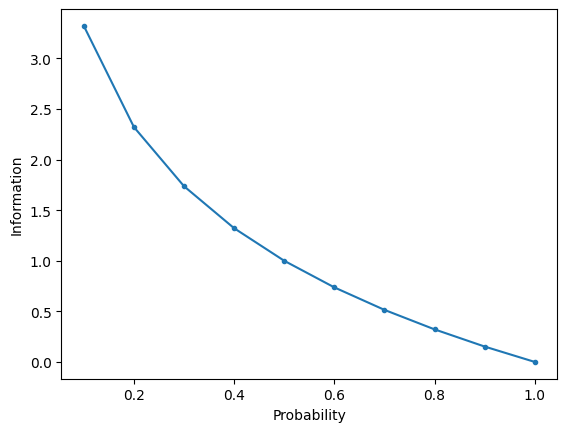

In [7]:
# 확률과 엔트로피

import numpy as np

from math import log2

from matplotlib import pyplot as plt

# 확률

probs = np.arange(0.1, 1.1, 0.1) # 0.1 ~ 1.0 (step 0.1)

print(probs)

# 정보량 계산

info = [-log2(p) for p in probs]

plt.plot(probs, info, marker='.')

plt.xlabel('Probability')

plt.ylabel('Information')

# 확률이 높을수록 정보량은 감소하고 확률이 낮을수록 정보량은 증가한다.

In [8]:
#랜덤 변수에 대한 정보를 계산하는 것을 '정보 엔트로피' 또는 '엔트로피'라고 함

#  각 사건의 확률에 대한 로그에 각 사건의 확률을 곱한 값의 합계의  음수

#주사위 던지기의 엔트로피 계산

from math import log2

# 경우의 수

n = 6

# 확률

p = 1.0 /n

# 엔트로피 공식

entropy = -sum([p * log2(p) for _ in range(n)])

print(entropy) #비트

print(log2(2)) #2에 거듭제곱을 해서 2가 되는 수는 1

print(log2(4)) #2에 거듭제곱을 해서 4가 되는 수는 2

#print(log2(0)) #2에 거듭제곱을 해서 0이 되는 수는 없음

2.584962500721156
1.0
2.0


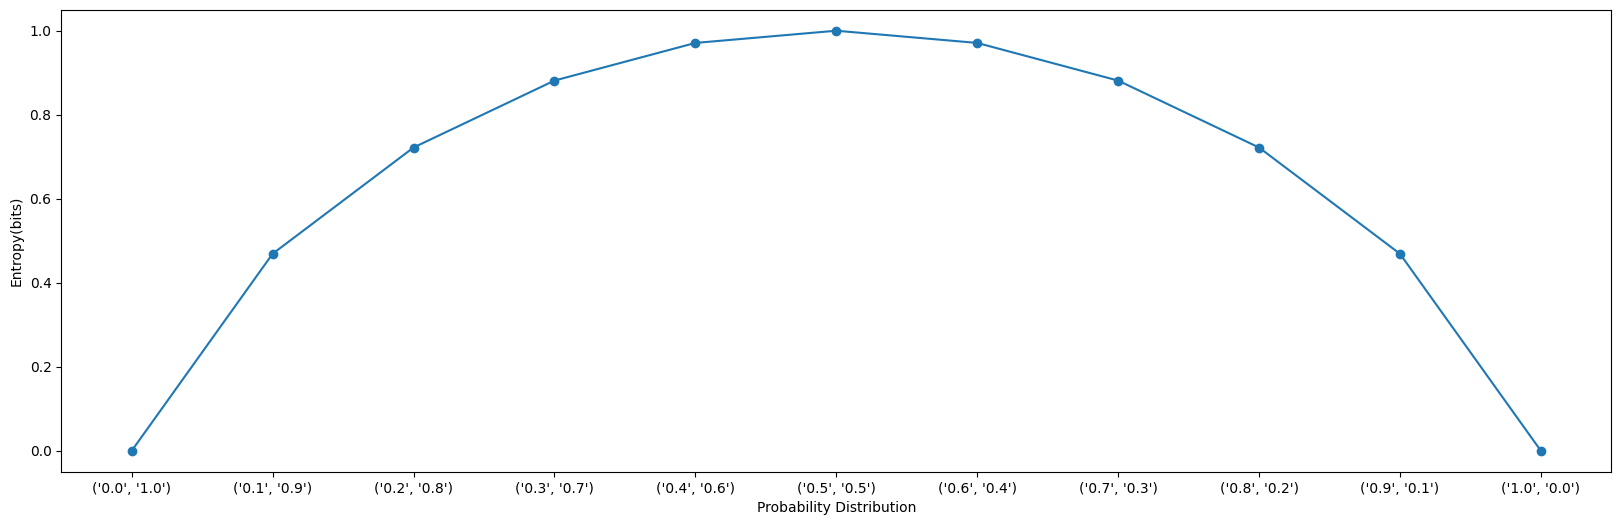

In [9]:
# 엔트로피는 0.0 ~ 1.0 사이의 값

# 1개 클래스만 구성되어 있으면(100% 순도) 0, 2개 클래스가 같은 비율(50:50)로 섞여 있으면 1.0

from math import log2

import matplotlib.pyplot as plt

def entropy(events):

    #1e-15 : 로그 계산에 오류가 발생하지 않도록 임의로 더해 주는 매우 작은 숫자값

    return -sum([p * log2(p + 1e-15) for p in events])

# 확률

probs = np.arange(0.0, 1.1, 0.1)

# 확률 분포

dists = [[p, 1 - p] for p in probs]

# 각 분포에 대한 엔트로피 계산

ents = [entropy(d) for d in dists]

# 학률분포와 엔트로피 그래프

plt.figure(figsize=(20,6))

plt.plot(probs, ents, marker='o')

xnum=[]

for d in dists:

    dd = (f'{d[0]:.1f}',f'{d[1]:.1f}')

    xnum.append(dd)

plt.xticks(probs, xnum)

plt.xlabel('Probability Distribution') #확률 분포

plt.ylabel('Entropy(bits)') #엔트로피

plt.show()

In [10]:
# 지니 계수 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표(0 ~ 0.5)

# 100% 순수한 노드로 구성되어 있으면 0

# 클래스별로 균등하게 분포되어 있으면(50:50) 0.5

# 로그를 계산할 필요가 없어서 엔트로피보다 구현 성능이 좀더 우수함

import numpy as np

a = np.array([1,3,6])

b = np.array([2,4,6])

#a의 각 원소에서 b의 각 원소를 뺀 행렬

diff = np.subtract.outer(a, b)

# 1-2 1-4 1-6

# 3-2 3-4 3-6

# 6-2 6-4 6-6

print(diff)

[[-1 -3 -5]
 [ 1 -1 -3]
 [ 4  2  0]]


In [11]:
def gini(x):

    # 평균 절대 오차

    mad = np.abs(np.subtract.outer(x, x)).mean()

    # 평균 절대 오차를 평균으로 나누고

    rmad = mad/np.mean(x)

    # 0.5를 곱하여 리턴

    g = 0.5 * rmad

    return g

v = [0,1,0,1] #2개 클래스가 균등하게 섞여 있으면 지니 계수는 0.5

print(gini(v))

v = [1,1,1,1] #1개 클래스만으로 100% 구성되어 있으면 지니 계수는 0

print(gini(v))

v = [1,0,1,1]

print(gini(v))

0.5
0.0
0.25


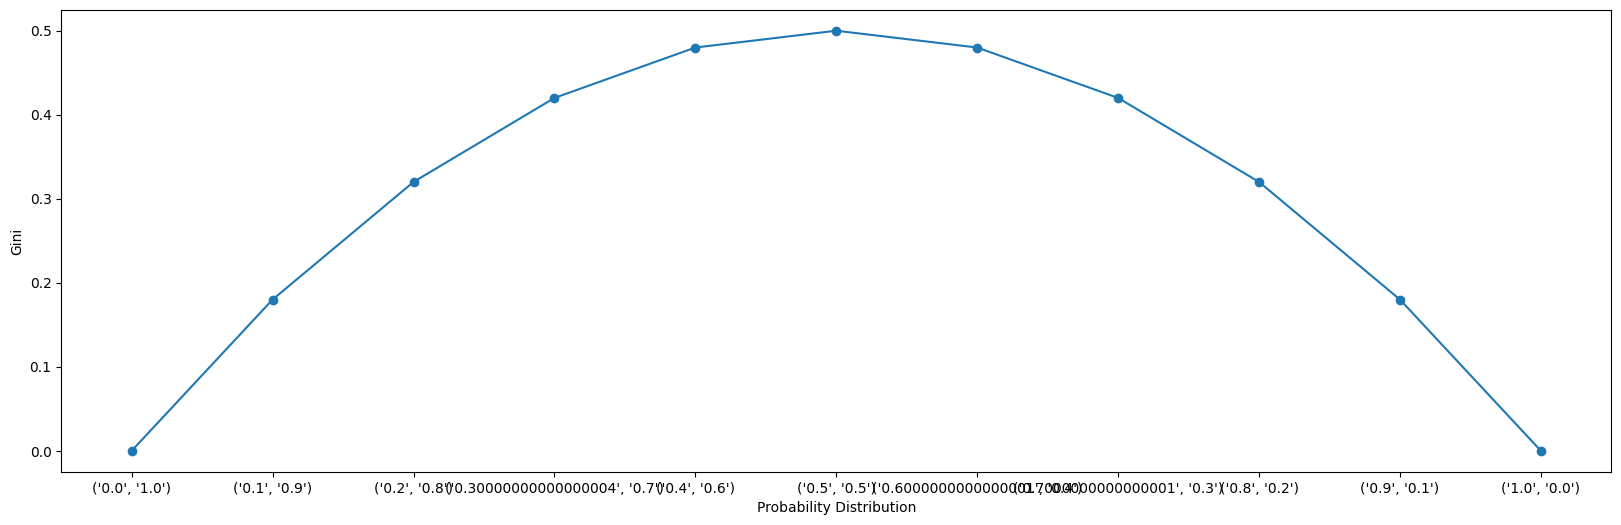

In [12]:
# 지니계수는 0.0 ~ 0.5 사이의 값

# 1개 클래스만 구성되어 있으면(100% 순도) 0, 2개 클래스가 같은 비율(50:50)로 섞여 있으면 0.5

%matplotlib inline

from math import log2

from matplotlib import pyplot

def gini2(events):

    return sum([p * (1 - p) for p in events])

# 확률

probs = np.arange(0.0, 1.1, 0.1)

# 확률 분포

dists = [[p, 1 - p] for p in probs]

# 각 분포에 대한 지니계수 계산

ents = [gini2(d) for d in dists]

# 확률분포와 지니계수 그래프

plt.figure(figsize=(20,6))

plt.plot(probs, ents, marker='o')

xnum=[]

for d in dists:

    dd = (str(d[0]),'{:.1f}'.format(d[1]))

    xnum.append(dd)

plt.xticks(probs, xnum)

plt.xlabel('Probability Distribution') #확률 분포

plt.ylabel('Gini') #지니계수

plt.show()

#### 3) 트리 모형의 splitter

학습용: 0.8494897959183674
검증용: 0.7857142857142857
학습용: 0.7270408163265306
검증용: 0.7244897959183674


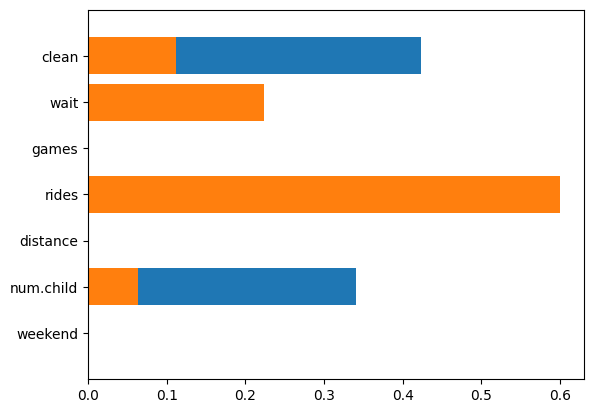

In [14]:
import pandas as pd

df=pd.read_csv('../DATA/rides2.csv')

df

################################################

df["overall"].value_counts()

################################################

train_cols = df.columns[:-1]

X = df[train_cols]

y = df["overall"]

################################################

#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['overall'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["overall"].value_counts()

################################################

X = X_samp[train_cols] # 독립변수

y = y_samp["overall"]

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

################################################

#splitter {best, random}, default=best

#각 노드에서 분할을 선택하는 데 사용된 전략

# best : 최선의 변수를 선택하는 방식(랜덤포레스트에서 사용하는 방식)

# random : 무작위로 변수를 선택하는 방식(엑스트라 트리에서 사용하는 방식)

################################################

from sklearn.tree import DecisionTreeClassifier

#트리 모형 생성(기본옵션)

model1 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=0)

model1.fit(X_train, y_train)

print("학습용:",model1.score(X_train, y_train))

print("검증용:",model1.score(X_test, y_test))

################################################

#무작위 분할을 선택하는 방식

model2 = DecisionTreeClassifier(splitter='random',max_depth=3, random_state=0)

model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))

print("검증용:",model2.score(X_test, y_test))

################################################

import numpy as np

import matplotlib.pyplot as plt 



def plot_tree(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), train_cols)

    plt.ylim(-1, n_features)

#특성 중요도

plot_tree(model1)

plot_tree(model2)

#### 4) 트리 모형의 ccp_alpha

[0.         0.00113342 0.00120898 0.00121438 0.00121438 0.00125761
 0.00125833 0.00128602 0.00129534 0.00130901 0.00146454 0.00172712
 0.00172712 0.00172712 0.00172712 0.00172712 0.0017631  0.00191383
 0.00207254 0.00214302 0.00215889 0.00215889 0.00222058 0.00230282
 0.00233161 0.00235574 0.00239535 0.00241796 0.00246731 0.00279822
 0.00307412 0.00392459 0.0039904  0.00514325 0.00519395 0.00643018
 0.00749875 0.00904502 0.01086835 0.01431868 0.01492276 0.01871751
 0.0224502  0.06710858 0.07691145]
[0.         0.00226684 0.0046848  0.00711356 0.00954231 0.01708797
 0.01960462 0.02217666 0.02347199 0.02609    0.03194816 0.03367528
 0.0354024  0.03712951 0.03885663 0.04058374 0.04234684 0.06531281
 0.06738535 0.06952837 0.07168726 0.07384615 0.07606673 0.07836955
 0.08303277 0.10423444 0.11142048 0.11383844 0.11630575 0.1247004
 0.13392276 0.14177195 0.14576234 0.15090559 0.15609954 0.16252973
 0.17002848 0.1790735  0.18994186 0.20426054 0.2191833  0.25661832
 0.27906852 0.3461771  0.5  

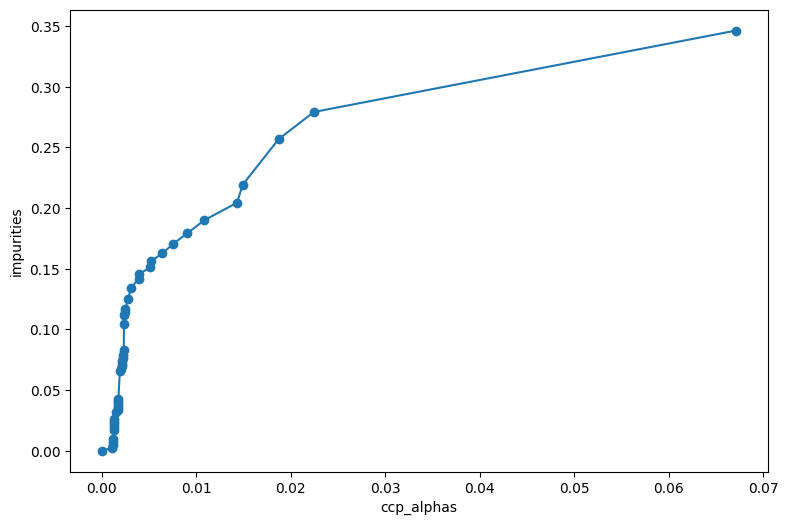

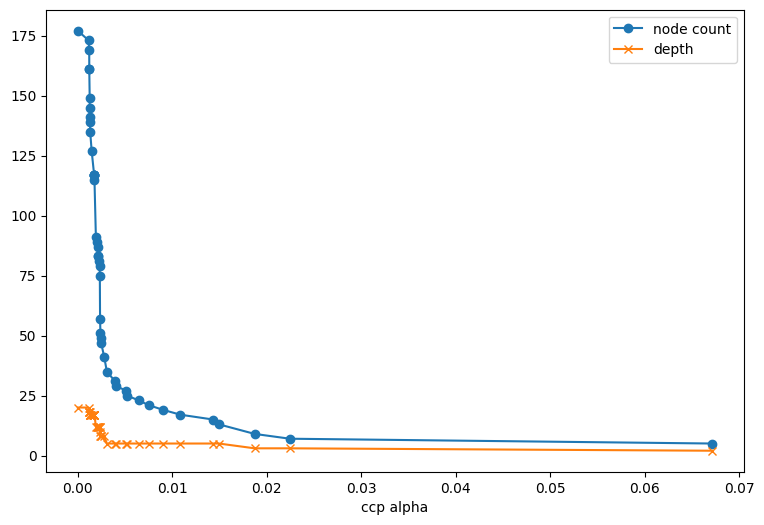

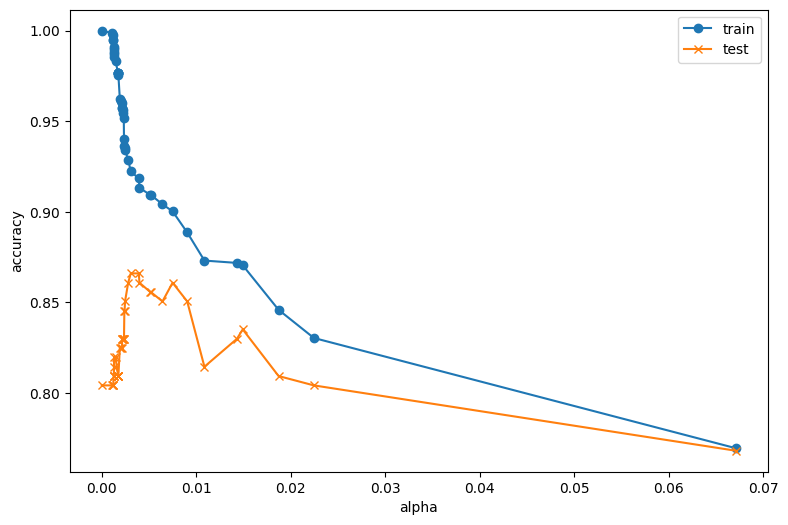

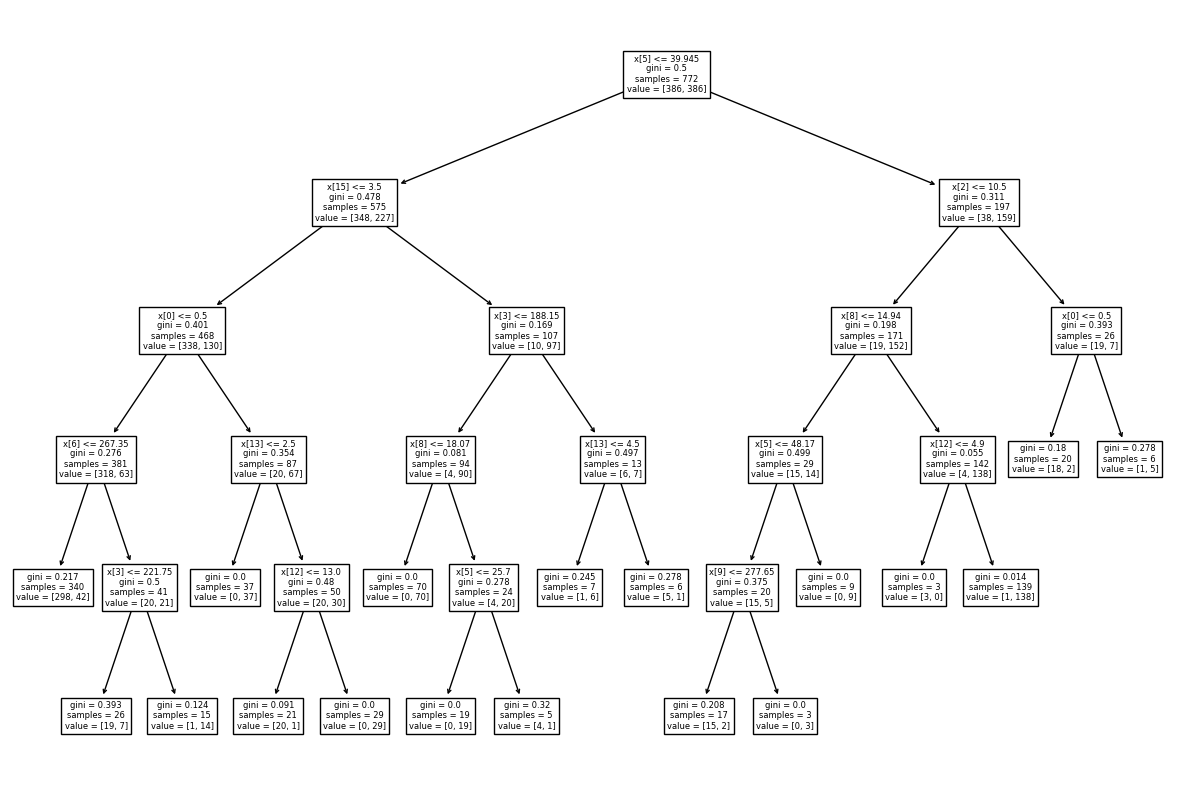

In [17]:
#ccp_alpha: 값이 커지면 가지치기하는 노드수가 증가하고

#  값이 작아지면 가지치기하는 노드수가 감소한다(가지치기 양을 조정하는 옵션)

import pandas as pd

df = pd.read_csv("../DATA/customer.csv")

df

################################################

train_cols = df.columns[:-1]

X = df[train_cols]

y = df["Churn"]

y.value_counts()

################################################

#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=train_cols)

y_samp=pd.DataFrame(data=y_sample, columns=['Churn'])

df2=pd.concat([X_samp,y_samp],axis=1)

################################################

X=df2[train_cols]

y=df2['Churn']

y.value_counts()

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

################################################

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

#가지치기 경로 정보

path = clf.cost_complexity_pruning_path(X_train, y_train)

#print(path)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(ccp_alphas) # 값이 크면 제거된 노드수가 증가(가지치기 양을 조정하는 옵션)

print(impurities) # 노드의 불순도

################################################

%matplotlib inline

import matplotlib.pyplot as plt

#fig, ax = plt.subplots()

#마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력

plt.figure(figsize=(9,6))

plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')

plt.xlabel("ccp_alphas")

plt.ylabel("impurities")

# ccp_alpha 값이 크면 제거된 노드수가 증가함

################################################

clfs = []

for ccp_alpha in ccp_alphas:

    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    clf.fit(X_train, y_train)

    clfs.append(clf)

#마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력

clfs = clfs[:-1]

ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]

depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(9,6))

plt.plot(ccp_alphas, node_counts, marker='o', label='node count')

plt.plot(ccp_alphas, depth, marker='x', label='depth')

plt.xlabel("ccp alpha")

plt.legend()

#ccp alpha가 증가하면 노드 개수가 감소한다.(가지치기를 많이 하는 옵션)

################################################

import numpy as np

train_scores = [clf.score(X_train, y_train) for clf in clfs]

test_scores = [clf.score(X_test, y_test) for clf in clfs]

m=max(test_scores)

i=np.argmax(test_scores)

print('최고 정확도:',m)

print('최적의 alpha:',ccp_alphas[i])

plt.figure(figsize=(9,6))

plt.xlabel("alpha")

plt.ylabel("accuracy")

plt.plot(ccp_alphas, train_scores, marker='o', label="train")

plt.plot(ccp_alphas, test_scores, marker='x', label="test")

plt.legend()

################################################

#ccp_alpha가 0이면 과적합 문제 발생

#alpha가 증가하면 가지치기가 진행되어 일반적인 트리가 됨

#model=DecisionTreeClassifier(random_state=0, ccp_alpha=0)

model=DecisionTreeClassifier(random_state=0, ccp_alpha=0.0033589246858478222)

#model=DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)

model.fit(X_train,y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

################################################

from sklearn import tree

plt.figure(figsize=(15,10)) #그래프의 사이즈 설정

tree.plot_tree(model) #트리모형 그래프

plt.show()

#### 5) 트리 모형의 max_leaf_nodes

1.0
0.7662337662337663


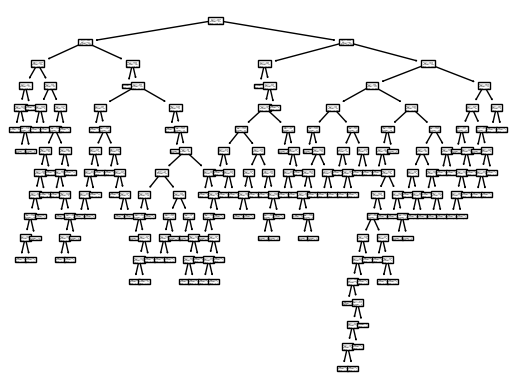

0.7638436482084691
0.7597402597402597


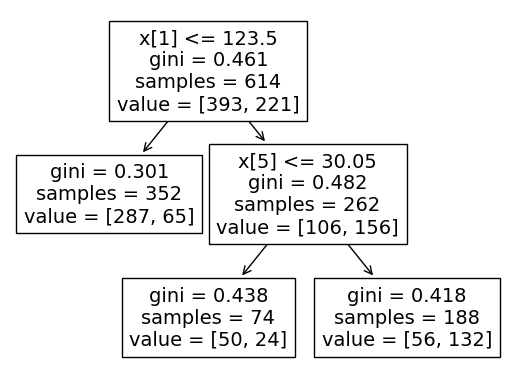

0.7736156351791531
0.7792207792207793


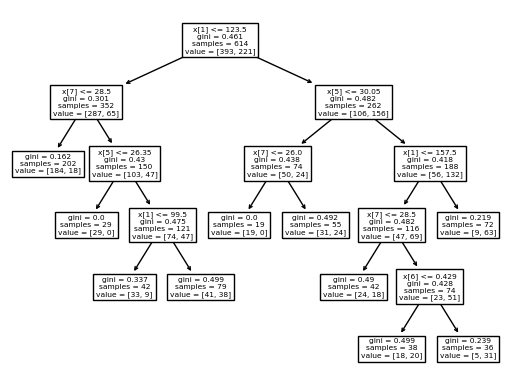

|--- glucose <= 123.50
|   |--- class: 0
|--- glucose >  123.50
|   |--- bmi <= 30.05
|   |   |--- class: 0
|   |--- bmi >  30.05
|   |   |--- class: 1

전체 노드 개수: 5
노드의 임계값: [123.5         -2.          30.05000019  -2.          -2.        ]


In [19]:
import pandas as pd

df = pd.read_csv("../DATA/pima.csv")

################################################

X=df[df.columns[0:-1]]

y=df['outcome']

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

################################################

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)

model1.fit(X_train, y_train)

print(model1.score(X_train,y_train))

print(model1.score(X_test,y_test))

################################################

import matplotlib.pyplot as plt

from sklearn import tree

tree.plot_tree(model1)

plt.show()

################################################

#max_leaf_nodes : leaf node(자식 노드가 없는 노드)의 최대 개수

#min_samples_leaf : leaf node가 되기 위한 최소한의 샘플 개수

#min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수

model2 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

model2.fit(X_train, y_train)

print(model2.score(X_train,y_train))

print(model2.score(X_test,y_test))

tree.plot_tree(model2)

plt.show()

################################################

model3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

model3.fit(X_train, y_train)

print(model3.score(X_train,y_train))

print(model3.score(X_test,y_test))

tree.plot_tree(model3)

plt.show()

################################################

from sklearn.tree import export_text

#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력

tree_rules = export_text(model2, feature_names=list(X_train.columns))

print(tree_rules)

################################################

# tree_ : 트리의 루트 노드

n_nodes = model2.tree_.node_count

print('전체 노드 개수:',n_nodes)

threshold = model2.tree_.threshold

print('노드의 임계값:',threshold)

#### 6) 민감도와 특이도

[ 1.46512894 -1.03203074 -0.7355014   0.90163222  0.90811712 -1.10892301
  1.28523411 -2.9451636   1.29344604  2.10010735  2.4718164  -2.1000621
  0.16408684 -1.18284583 -0.64727888 -0.9956665 ]
[1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0]
0.875
0.125


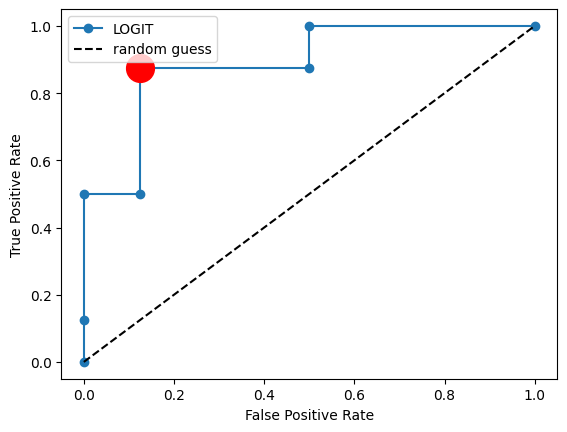

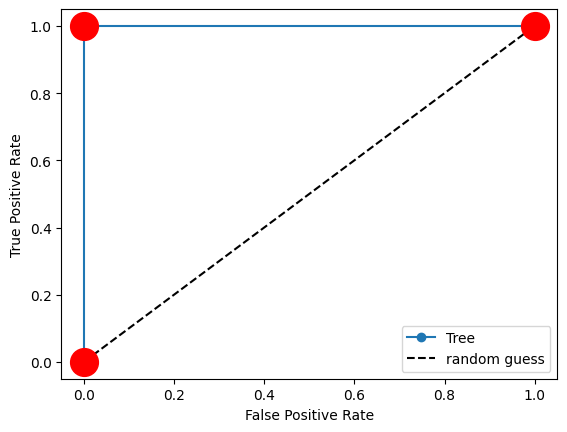

In [20]:
# 민감도(TPR, True Positive Rate) - 1을 1로 잘 맞춘 비율, 재현율(recall)이라고도 함

# 특이도(FPR, False Positive Rate) - 실제값 0을 1로 잘못 예측한 비율, 위양성율(fall-out)이라고도 함

#   낮을수록 좋은 모형

# 예) 암진단 - 암환자를 암환자로 잘 진단한 경우, 암환자가 아닌데 암환자로 오진한 경우

# 민감도를 높이기 위해서는 True로 판단하는 기준(threshold)을 낮춘다.

# 그러면 False를 True로 판단하는 샘플이 증가하게 되어 특이도가 동시에 증가한다.

# 반대로 특이도를 낮추기 위해 True로 판단하는 기준을 높이면 민감도가 떨어진다.

# ROC(Receiver Operator Characteristic) Curve:

#     클래스 판별 기준값의 변화에 따른 민감도와 특이도의 변화를 시각화한 것

#     판별함수의 판별 기준값이 달라질 때 판별 결과가 어떻게 달라지는지를 표현한 그래프

################################################

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=16, n_features=2,

                           n_informative=2, n_redundant=0,

                           random_state=10)

################################################

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

y_hat = model.predict(X)

f_value = model.decision_function(X) #판별함수

print(f_value)  

print(model.predict(X))

################################################

import numpy as np

import pandas as pd


df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])

#f값을 내림차순으로 정렬

df.sort_values("f", ascending=False).reset_index(drop=True)

################################################

#0을 기준으로 계산한 결과

from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat, labels=[0,1])

################################################

#0을 기준으로 계산한 결과

#array([[7, 1],

#       [1, 7]], dtype=int64)

fpr0 = 1 / (7 + 1) # 0을 1로 잘못 분류한 값(특이도)

tpr0 = 7 / (1 + 7) # 1을 1로 잘 찾아낸 값(민감도, recall)

print(tpr0)

print(fpr0)

################################################

#판별함수의 출력값에 따라 판별기준을 바꾸어 계산한 fpr,tpr

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

fpr, tpr, thresholds

################################################

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="LOGIT")

plt.plot([0, 1], [0, 1], 'k--', label="random guess")

plt.plot([fpr0], [tpr0], 'ro', ms=20)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

################################################

#판별함수가 제공되지 않는 모형은 predict_proba() 함수를 사용할 수 있음

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier().fit(X,y)

y_hat=model.predict(X)

#f_value=model.decision_function(X) #판별함수가 없음

fpr,tpr,thresholds=roc_curve(y, model.predict_proba(X)[:,1])  

fpr,tpr,thresholds

################################################

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Tree")

plt.plot([0, 1], [0, 1], 'k--', label="random guess")

plt.plot([fpr], [tpr], 'ro', ms=20)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

#### 7) ROC와 AUC

['cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age']
학습용: 0.8543689320388349
검증용: 0.8106796116504854
학습용: 0.7912621359223301
검증용: 0.7669902912621359
0.9975728155339806
0.9077669902912622
학습용: 0.8543689320388349
검증용: 0.8106796116504854
학습용: 0.7912621359223301
검증용: 0.7669902912621359
0.9975728155339806
0.9077669902912622


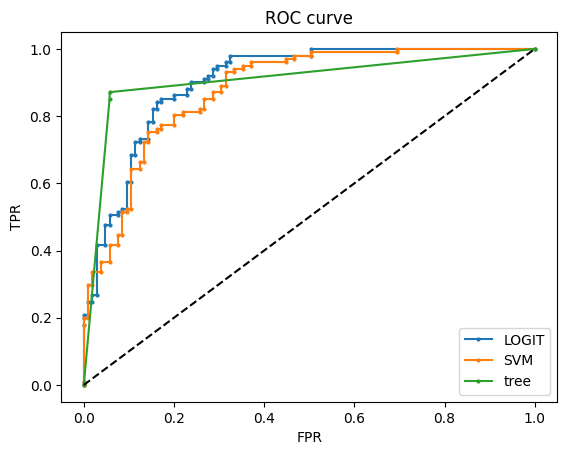

(0.9045733144743046, 0.8807166430928808, 0.9065063649222064)

In [23]:
import pandas as pd

df = pd.read_csv("../DATA/concrete.csv")

df.head()

################################################

train_cols = [ 'cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age']

print(train_cols)

X = df[train_cols]

y = df["class"]

################################################

#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['class'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["class"].value_counts()

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,   test_size=0.2, stratify=y, random_state=0)

################################################

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=0, max_iter=1000)

model1.fit(X_train, y_train)

print("학습용:",model1.score(X_train, y_train))

print("검증용:",model1.score(X_test, y_test))

################################################

#판별함수: 음수이면 0, 양수이면 1로 판별함, 0이 판별기준이 됨

model1.decision_function(X_test[:5])

################################################

model1.predict(X_test[:5]) # 판별함수값이 0보다 작으면 0, 0보다 크면 1로 분류

################################################

from sklearn.svm import SVC

model2 = SVC(random_state=0)

model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))

print("검증용:",model2.score(X_test, y_test))

################################################

model2.decision_function(X_test[:5])

################################################

from sklearn.tree import DecisionTreeClassifier  

model3=DecisionTreeClassifier(random_state=0)  

model3.fit(X_train,y_train)  

print(model3.score(X_train,y_train))  

print(model3.score(X_test,y_test))

################################################

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

#TPR(True Positive Rate, 민감도) - 1을 1로 잘 맞춘 비율, y축

#FPR(False Positive Rate, 특이도) - 0을 1로 틀린 비율, x축

fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.decision_function(X_test))

fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.decision_function(X_test))

fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

#면적(0.5~1.0)이 1에 가까울수록(좌측상단 꼭지점에 다가갈수록) 좋은 모형

print("학습용:",model1.score(X_train, y_train))

print("검증용:",model1.score(X_test, y_test))

################################################

#판별함수: 음수이면 0, 양수이면 1로 판별함, 0이 판별기준이 됨

model1.decision_function(X_test[:5])

################################################

model1.predict(X_test[:5]) # 판별함수값이 0보다 작으면 0, 0보다 크면 1로 분류

################################################

from sklearn.svm import SVC

model2 = SVC(random_state=0)

model2.fit(X_train, y_train)

print("학습용:",model2.score(X_train, y_train))

print("검증용:",model2.score(X_test, y_test))

################################################

model2.decision_function(X_test[:5])

################################################

from sklearn.tree import DecisionTreeClassifier  

model3=DecisionTreeClassifier(random_state=0)  

model3.fit(X_train,y_train)  

print(model3.score(X_train,y_train))  

print(model3.score(X_test,y_test))

################################################

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

#TPR(True Positive Rate, 민감도) - 1을 1로 잘 맞춘 비율, y축

#FPR(False Positive Rate, 특이도) - 0을 1로 틀린 비율, x축

fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.decision_function(X_test))

fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.decision_function(X_test))

fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

#면적(0.5~1.0)이 1에 가까울수록(좌측상단 꼭지점에 다가갈수록) 좋은 모형

plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")

plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")

plt.plot(fpr3, tpr3, 'o-', ms=2, label='tree')

plt.legend()

plt.plot([0, 1], [0, 1], 'k--', label="random guess")

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.title('ROC curve')

plt.show()

# 좌측상단 꼭지점에 가까울수록 더 좋은 모형

################################################

#AUC(Area Under the Curve) : ROC Curve의 면적

#1에 가까울수록 좋은 모형

from sklearn.metrics import auc  

auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)

#### 8) 다중클래스의 ROC

In [30]:
import pandas as pd

df = pd.read_csv("../DATA/iris.csv")

################################################

X=df[df.columns[:-2]]

y=df['Species']

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)








In [31]:
################################################

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_score = model.decision_function(X_test)

print(y_score[::20])

print(model.predict(X_test[::20]))


[[ 6.77639365  3.0296375  -9.80603115]
 [ 6.62628641  2.67678173 -9.30306813]]
[0 0]


In [32]:
################################################

from sklearn.metrics import confusion_matrix

y_hat=model.predict(X_test)

confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [33]:
################################################

from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
################################################

#roc_curve() 함수는 이진분류에만 지원됨

from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

# fpr, tpr, thresholds

#다중 클래스에 대해서는 ROC Curve를 그릴 수 없으므로

#각각의 클래스에 대해 별도로 ROC Curve를 그려야 함

#y변수를 원핫인코딩한 리스트

from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0,1,2])

y[::20]

################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)



{0: 1.0, 1: 0.475, 2: 1.0}


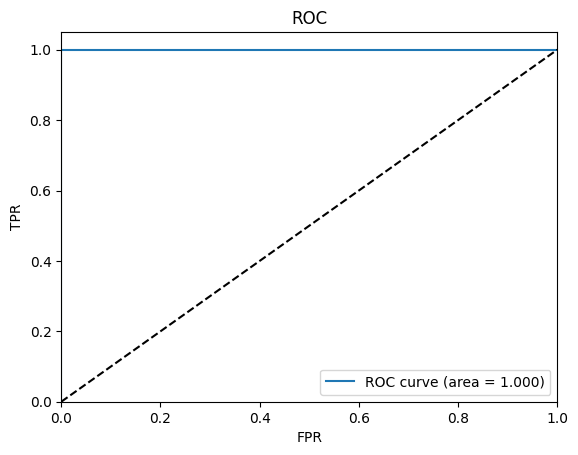

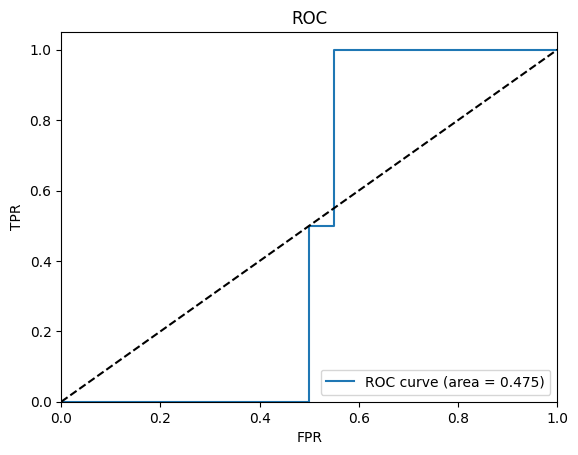

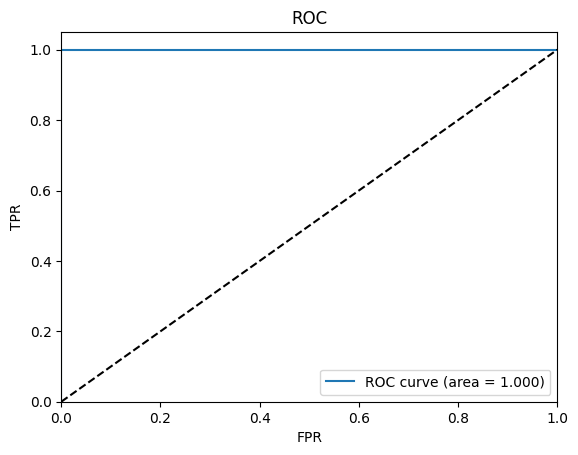

In [35]:
################################################

from sklearn.metrics import auc

import matplotlib.pyplot as plt

n_classes = 3

fpr = dict()

tpr = dict()

roc_auc = dict()

y_score = model.decision_function(X_test)

for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc)    

for i in range(n_classes):

    plt.figure()

    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %.3f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])

    plt.ylim([0.0, 1.05])

    plt.xlabel('FPR')

    plt.ylabel('TPR')

    plt.title('ROC')

    plt.legend(loc="lower right")

    plt.show()

#### 9) 트리 모형의 min_samples_split

[0.68731656 0.7374724  0.76586932 0.77676834 0.78944235 0.78680154
 0.79156883 0.79634172 0.79734556 0.80109574 0.79870755 0.79870755
 0.79754088 0.7982673  0.80199301 0.79594444 0.78316667 0.77030294
 0.76592558 0.76592558 0.76592558 0.76117365 0.75559713 0.75400594
 0.75400594 0.74200035 0.74200035 0.74200035 0.7377362  0.7377362
 0.7377362  0.7377362  0.7377362  0.7377362  0.73290287 0.73290287
 0.73290287 0.73290287 0.73290287 0.70984207 0.70984207]
[0.72146677 0.72669553 0.7214413  0.7188439  0.73185638 0.73056617
 0.73966556 0.74358713 0.73967405 0.74618453 0.73966556 0.73966556
 0.73966556 0.74096426 0.73312962 0.73705118 0.73575248 0.74484339
 0.74092182 0.74092182 0.74092182 0.73311264 0.73181394 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152]
{'min_samples_split': 142}
142.0
92.0


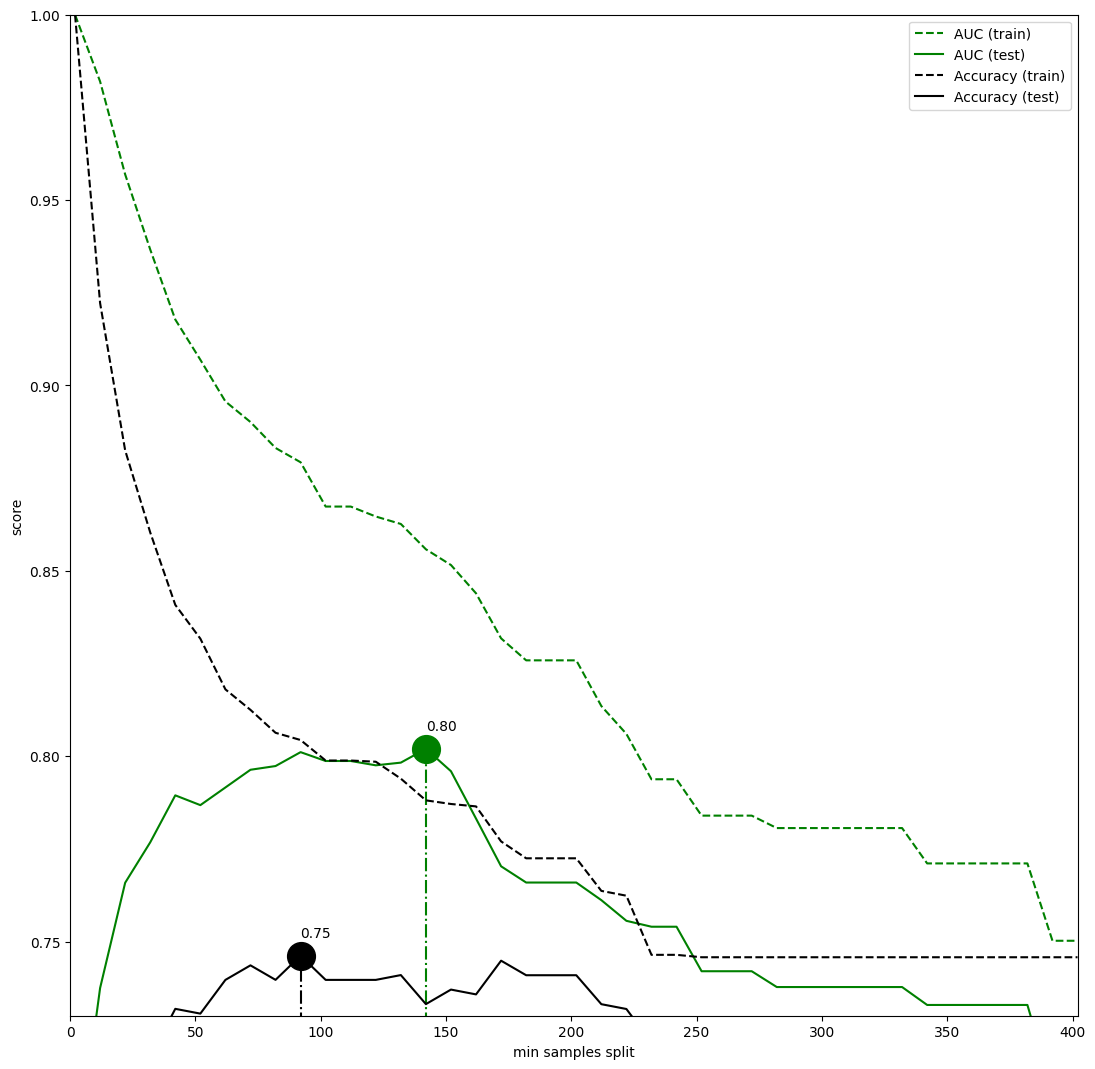

In [26]:
import pandas as pd

df = pd.read_csv("../DATA/pima.csv")

df

################################################

X=df[df.columns[:-1]]

y=df['outcome']

################################################

from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

#refit='AUC' 추정값을 교차검증한 AUC 점수가 가장 좋은 매개변수

#make_scorer() 사용자정의 평가함수를 지정하는 함수

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# refit 최적의 파라미터를 적용하는 옵션

gs = GridSearchCV(DecisionTreeClassifier(random_state=10),

  param_grid={'min_samples_split': range(2, 403, 10)},

  scoring=scoring, refit='AUC', return_train_score=True)

gs.fit(X, y)

results = gs.cv_results_

results

################################################

print(results['mean_test_AUC'])

print(results['mean_test_Accuracy'])

print(gs.best_params_) #최적의 파라미터

################################################

#다양한 측정 지표를 사용하여 평가한 GridSearchCV

from matplotlib import pyplot as plt

import numpy as np


plt.figure(figsize=(13, 13))

plt.xlabel("min samples split")

plt.ylabel("score")

ax = plt.gca() #current axes 반환

ax.set_xlim(0, 402)

ax.set_ylim(0.73, 1)

#min_samples_split의 값

X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):

    for sample, style in (('train', '--'), ('test', '-')):

        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]

        ax.plot(X_axis, sample_score_mean, style, color=color, label="%s (%s)" % (scorer, sample))

    

    best_index=np.argmax(results['mean_test_%s' % scorer])

    best_score=results['mean_test_%s' % scorer][best_index]

    # 최고 점수에 수직선 표시

    ax.plot([X_axis[best_index], ] * 2, [0, best_score],

            linestyle='-.', color=color, marker='o',  ms=20)

    # 최고 점수 표시

    ax.annotate("%0.2f" % best_score,

                (X_axis[best_index], best_score + 0.005))

    print(X_axis[best_index])

plt.legend()

plt.show()

#### 10) 회귀트리

In [1]:
import pandas as pd

df = pd.read_csv('../DATA/ram_price.csv')

df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price ($/Mbyte)')

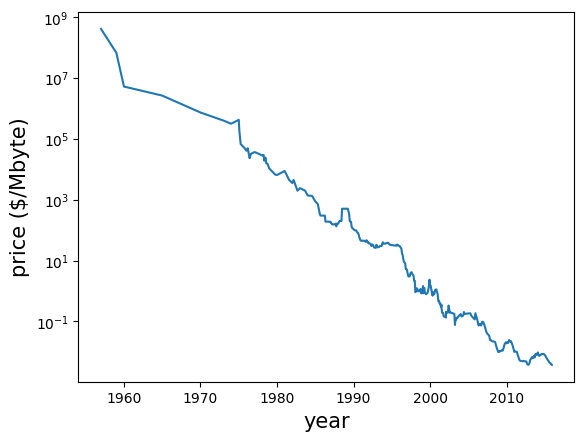

In [2]:
################################################

import matplotlib.pyplot as plt

#y축 로그 스케일

plt.semilogy(df['date'], df['price'])

plt.xlabel('year', size=15)

plt.ylabel('price ($/Mbyte)', size=15)

# x축 날짜, y축 램 가격

#시간이 지날수록 램 가격은 점차 하락하고 있음

In [23]:
import numpy as np

#학습용과 검증용 구분(2000년 이전과 이후로 구분)

X_train0 = df[df['date'] < 2000]

X_test = df[df['date'] >= 2000]

#기계학습모형에는 2차원 형태의 데이터가 입력되어야 함

X_train = X_train0['date'][:, None] # date 필드만을 선택하여 2차원으로 변환

# y값을 로그 스케일로 변환

y_train = np.log(X_train0['price'])

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12768\3170420825.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train0['date'][:, None] # date 필드만을 선택하여 2차원으로 변환


In [24]:
################################################

from sklearn.tree import DecisionTreeRegressor  

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR



tree = DecisionTreeRegressor().fit(X_train.reshape(-1,1), y_train)
lr = LinearRegression().fit(X_train.reshape(-1,1), y_train) #선형회귀모형
svr = SVR(kernel='rbf').fit(X_train.reshape(-1,1), y_train)



#전체 기간의 자료

x_all = np.array(df['date']).reshape(-1, 1)

pred_tree = tree.predict(x_all)

price_tree = np.exp(pred_tree) # log값 되돌리기

pred_lr = lr.predict(x_all)

price_lr = np.exp(pred_lr) # log값 되돌리기



pred_svr = svr.predict(x_all)

price_svr = np.exp(pred_svr) # log값 되돌리기

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = tree.predict(X_test['price'].values.reshape(-1,1))

rms = np.sqrt(mean_squared_error(y_test, y_pred))

print(rms)

y_pred = lr.predict(X_test['price'].values.reshape(-1,1))

rms = np.sqrt(mean_squared_error(y_test, y_pred))

print(rms)

y_pred = svr.predict(X_test['price'].values.reshape(-1,1))

rms = np.sqrt(mean_squared_error(y_test, y_pred))

print(rms)

23.038370257895192
861.08402279523
10.42933757466685


Text(0, 0.5, 'price ($/Mbyte)')

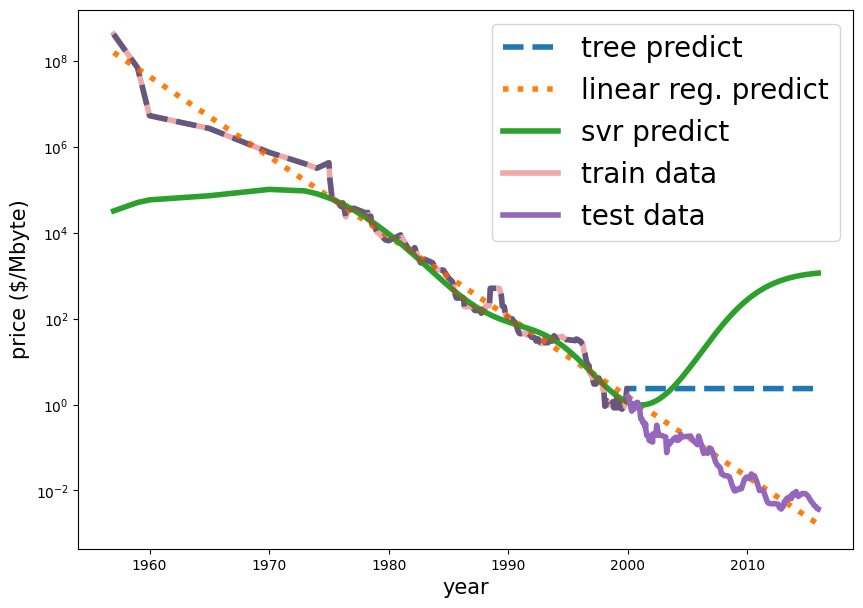

In [27]:
################################################

#실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교

plt.figure(figsize=(10,7))

plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')

plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls=':')

plt.semilogy(df['date'], price_svr,label='svr predict',lw='4',ls='-')

plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)

plt.semilogy(X_test['date'], X_test['price'], lw='4', label='test data')

plt.legend(loc=1, fontsize=20)

plt.xlabel('year', size=15)

plt.ylabel('price ($/Mbyte)', size=15)

# 선형회귀모형: 직선모양

# 결정트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력이 없음(트리 모형의 단점)

# 새로운 데이터를 예측하려면 시계열분석, 순환신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함

#### 11) 모형결합(다수결)

In [28]:
# 모형 결합(model combining)

# 앙상블 방법론(ensemble methods)

# 예측 성능을 향싱시키기 위하여 하나의 모형이 아닌 복수의 모형을 결합하는 방법

# 단일 모형을 사용하는 것보다 계산량이 증가하지만 성능이 향상될 수 있음(과적합 방지 등)

# 취합(aggregation)과 부스팅(boosting)

# 취합: 사용할 모형의 집합을 처음부터 고정

#     다수결(Majority Voting), 배깅(Baggind), 랜덤포레스트(Random Forest)

# 부스팅: 사용할 모형을 점진적으로 늘려가는 방법

#     에이다부스트(AdaBoost), 그레디언트 부스트(Gradient Boost)  

#다수결 방법

# Hard Voting: 단순 투표, 가장 많이 나온 결과를 채택(디폴트)

# Soft Voting: 가중치 투표, 개별 모형의 조건부 확률들을 합한 것들 중 가장 큰 것을 채택

################################################

import pandas as pd

# 신용카드 거래 데이터 csv 파일을 로딩(원본)

df = pd.read_csv("../DATA/creditcard.csv")

df.head()

################################################

train_cols = df.columns[1:-1]

print(train_cols)

X = df[train_cols] # 독립변수

y = df["Class"]

y.value_count()

################################################

#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Class'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2.Class.value_counts()

################################################

X = X_samp[train_cols] # 독립변수

y = y_samp["Class"]

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

################################################

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression(random_state=1, max_iter=1000)

model2 = DecisionTreeClassifier(random_state=1)

model3 = KNeighborsClassifier(n_neighbors=2)

#     estimators: 개별 모형 목록, 리스트나 named parameter 형식으로 입력

#     voting: {hard, soft} hard voting 과 soft voting 선택. 디폴트는 hard

# 로지스틱 회귀분석과 의사결정나무, KNN 3개를 다수결로 합친 모형

# estimators=[(alias, model)]

ensemble = VotingClassifier(estimators=[('lr', model1), ('tree', model2), ('knn', model3)], voting='soft')

for model in (model1, model2, model3, ensemble):

    print(model)

    model.fit(X_train,y_train)


    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

    

#일반적으로 다수결 모형이 개별 모형보다 성능이 더 좋음  

FileNotFoundError: [Errno 2] No such file or directory: '../DATA/creditcard.csv'

#### 12) 모형결합(배깅)

In [28]:
#배깅: 같은 모형을 사용하지만 같은 데이터 샘플을 중복사용하여 서로 다른 결과를 출력하는 다수의 모형을 사용하는 방법

################################################

# csv 파일을 로딩

import pandas as pd

df = pd.read_csv("../DATA/customer.csv")

df.head()

################################################

df["Churn"].value_counts()

################################################

train_cols = df.columns[0:16]

X = df[train_cols] # 독립변수

y = df["Churn"]

print(type(X), type(y))

print(X.head())

print(y.head())

################################################

#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["Churn"].value_counts()

################################################

X = df_samp[train_cols] # 독립변수

y = df_samp["Churn"]

################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

################################################

# BaggingClassifier : 배깅 모형 결합을 위한 클래스

#     base_estimator: 기본 모형

#     n_estimators: 모형 개수. 디폴트 10

#     bootstrap: 데이터의 중복 사용 여부. 디폴트 True

#     max_samples: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0

#     bootstrap_features: 특징 차원의 중복 사용 여부. 디폴트 False

#     max_features: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0

################################################

from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

model1=DecisionTreeClassifier(random_state=0)

model2=SVC(kernel='linear')

model3=BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0)

model4=BaggingClassifier(KNeighborsClassifier(n_neighbors=2), n_estimators=10, random_state=0)

model5=BaggingClassifier(SVC(), n_estimators=10, random_state=0)

for model in (model1, model2, model3, model4, model5):

    print(model)

    model.fit(X_train,y_train)

    print(model.score(X_train,y_train))

    print(model.score(X_test,y_test))

    print()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  \
0           0           1             25     265.1        110       45.07   
1           0           1             26     161.6        123       27.47   
2           0           0              0     243.4        114       41.38   
3           1           0              0     299.4         71       50.90   
4           1           0              0     166.7        113       28.34   

   Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   



#### 13) 모형결합(랜덤포레스트)

In [ ]:
# 랜덤포레스트: 의사결정나무를 개별 모형으로 사용하는 모형 결합 방법

# 배깅은 사용하는 모형의 종류에 제한이 없으나 랜덤포레스트는 의사결정나무 모형만을 사용한다.

# 독립변수의 차원을 랜덤하게 감소시킨 후 독립변수를 선택하는 방법

# csv 파일을 로딩

import pandas as pd

df = pd.read_csv("d:/data/heart/heart.csv")

df.head()

################################################

df["target"].value_counts()

################################################

train_cols = df.columns[0:13]

X = df[train_cols] # 독립변수

y = df["target"]

################################################

#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['target'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["target"].value_counts()

################################################

X = df_samp[train_cols] # 독립변수

y = df_samp["target"]

################################################


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

################################################

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier(random_state=0)

model2 = RandomForestClassifier(n_estimators=100, random_state=0)

for model in (model1, model2):

    print(model)

    model.fit(X_train,y_train)

    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

#랜덤포레스트의 변종으로 익스트림 랜덤 트리(Extemely Randomized Trees)

#  또는 엑스트라 트리(Extra Trees) 모형

# 랜덤포레스트를 개량한 모형

################################################

from sklearn.ensemble import ExtraTreesClassifier

model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)

for model in (model1, model2, model3):

    print(model)

    model.fit(X_train,y_train)

    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

    

# DecisionTree < RandomForest < ExtraTree 순으로 성능이 개선됨    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

################################################

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier(random_state=0)

model2 = RandomForestClassifier(n_estimators=100, random_state=0)

for model in (model1, model2):

    print(model)

    model.fit(X_train,y_train)

    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

#랜덤포레스트의 변종으로 익스트림 랜덤 트리(Extemely Randomized Trees)

#  또는 엑스트라 트리(Extra Trees) 모형

# 랜덤포레스트를 개량한 모형

################################################

from sklearn.ensemble import ExtraTreesClassifier

model3 = ExtraTreesClassifier(n_estimators=100, random_state=0)

for model in (model1, model2, model3):

    print(model)

    model.fit(X_train,y_train)

    print("학습용:",model.score(X_train, y_train))

    print("검증용:",model.score(X_test, y_test))

    print()

    

# DecisionTree < RandomForest < ExtraTree 순으로 성능이 개선됨    

################################################

#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용

#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

def plot_tree(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), train_cols)

    plt.xlabel("importances")

    plt.ylabel("variables")

    plt.ylim(-1, n_features)

################################################

plot_tree(model1)

################################################

plot_tree(model2)

################################################

plot_tree(model3)

#### 14) 부스팅